# Uploading, Streaming, and Sampling Data

## Uploading small amounts of data into memory

In [2]:
#The function accepts the filename, access mode is read (r)
with open("Colors.txt", 'r') as open_file:
    print('Colors.txt content:\n' + open_file.read()) #read(15) shows only the first 15 characters.

Colors.txt content:
Color	Value
Red	1
Orange	2
Yellow	3
Green	4
Blue	5
Purple	6
Black	7
White	8


## Streaming large amounts of data into memory

In [7]:
#This allows you to read data string by string, so to say.
with open("Colors.txt", 'r') as open_file:
    for observation in open_file:
        print('Reading Data: '+ observation)

Reading Data: Color	Value

Reading Data: Red	1

Reading Data: Orange	2

Reading Data: Yellow	3

Reading Data: Green	4

Reading Data: Blue	5

Reading Data: Purple	6

Reading Data: Black	7

Reading Data: White	8


## Generating variations on image data

(100, 100, 3)
30000


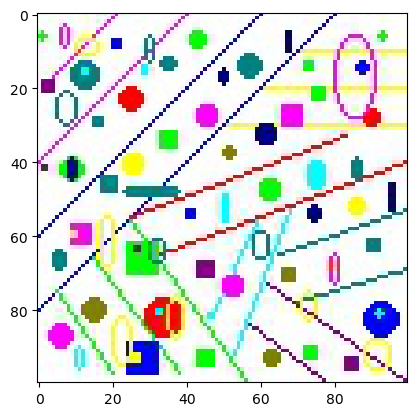

In [10]:
#Two matplotlib libraries are imported. 
import matplotlib.pyplot as plt #it reads the image into memory.
import matplotlib.image as img #pyplot displays it onscreen.
%matplotlib inline

image = img.imread("Colorblk.jpg")
print(image.shape) #image properties
print(image.size) #image size 100 x 100 x 3
plt.imshow(image) #loads the image for plotting.
plt.show() #displays the image on screen.

## Sampling data in different ways

In [11]:
#To get a specific row number.
#See enumerate(), Python w/o Fear.
n = 2
with open("Colors.txt", 'r') as open_file:
    for j, observation in enumerate(open_file): #retrieves a row number.
        if j % n==0:
            print('Reading Line: ' + str(j) +
            ' Content: ' + observation)

Reading Line: 0 Content: Color	Value

Reading Line: 2 Content: Orange	2

Reading Line: 4 Content: Green	4

Reading Line: 6 Content: Purple	6

Reading Line: 8 Content: White	8


In [19]:
from random import random #outputs a random value between 0 and 1.
sample_size = 0.25 #selects 25 percent of the items in the file.
with open("Colors.txt", 'r') as open_file:
    for j, observation in enumerate(open_file): #random() is working constantly inside the loop will j == 8.
        if random()<=sample_size:
            print('Reading Line: ' + str(j) +
            ' Content: ' + observation)

Reading Line: 1 Content: Red	1

Reading Line: 3 Content: Yellow	3

Reading Line: 6 Content: Purple	6



# Accessing Data in Structured Flat-File Form

## Reading from a text file

In [20]:
#The parser (ayristirici) interprets the first row as consisting of field names.
import pandas as pd
color_table = pd.io.parsers.read_table("Colors.txt")
print(color_table)

    Color  Value
0     Red      1
1  Orange      2
2  Yellow      3
3   Green      4
4    Blue      5
5  Purple      6
6   Black      7
7   White      8


## Reading CSV delimited format

In [21]:
import pandas as pd
titanic = pd.io.parsers.read_csv("Titanic.csv") #read_csv understands CSV files
X = titanic[['age']] #selecting a specific field is easy, you supply the field name.
print(X)

            age
0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
...         ...
1304    14.5000
1305  9999.0000
1306    26.5000
1307    27.0000
1308    29.0000

[1309 rows x 1 columns]


In [22]:
X = titanic[['age']].values #To print output as a list, which is not human readable.
print(X)

[[29.        ]
 [ 0.91670001]
 [ 2.        ]
 ...
 [26.5       ]
 [27.        ]
 [29.        ]]


## Reading Excel and other Microsoft Office files

In [30]:
#pip install xlrd>=2.0.1 -> Anaconda Prompt
import pandas as pd
xls = pd.ExcelFile("Values.xls") #it creates a pointer to the excel file.
#You pick sheet no, indexing, set na (no value) cells to NA.
trig_values = xls.parse('Sheet1', index_col=None, #index_col = None means panda should generate index for u.
                        na_values=['NA'])
print(trig_values)

    Angle (Degrees)      Sine    Cosine    Tangent
0        138.550574  0.661959 -0.749540  -0.883153
1        305.535745 -0.813753  0.581211  -1.400100
2        280.518695 -0.983195  0.182556  -5.385709
3        216.363795 -0.592910 -0.805269   0.736289
4         36.389247  0.593268  0.805005   0.736974
..              ...       ...       ...        ...
67       324.199562 -0.584964  0.811059  -0.721234
68       187.948172 -0.138277 -0.990394   0.139619
69       270.678249 -0.999930  0.011837 -84.472139
70       270.779159 -0.999908  0.013598 -73.530885
71       200.213513 -0.345520 -0.938412   0.368196

[72 rows x 4 columns]


# Sending Data in Unstructured File Form

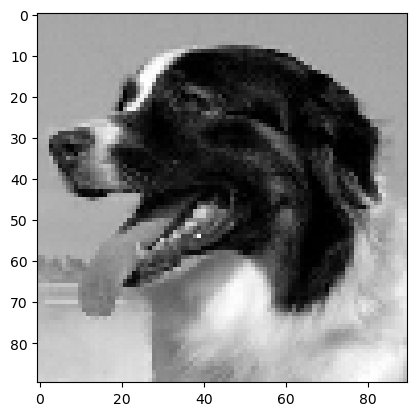

In [2]:
#from skimage.io import imread
#from skimage.transform import resize
#from matplotlib import pyplot as plt
#import matplotlib.cm as cm

import matplotlib.pyplot as plt
from skimage import io, color

example_file = "http://upload.wikimedia.org/wikipedia/commons/7/7d/Dog_face.png"
image = io.imread(example_file)
gray_image = color.rgb2gray(image)

plt.imshow(gray_image, cmap=plt.cm.gray)
plt.show()


#example_file = ("http://upload.wikimedia.org/" +
    #"wikipedia/commons/7/7d/Dog_face.png")
#image = imread(example_file, as_grey=True) #as_grey turns any color into gray scale.
#plt.imshow(image, cmap=cm.gray) #cmap uses greyscale color map.
#plt.show()

In [3]:
#To find out more about the the image.
print("data type: %s, shape: %s" %
      (type(image), image.shape))

data type: <class 'numpy.ndarray'>, shape: (90, 90, 3)


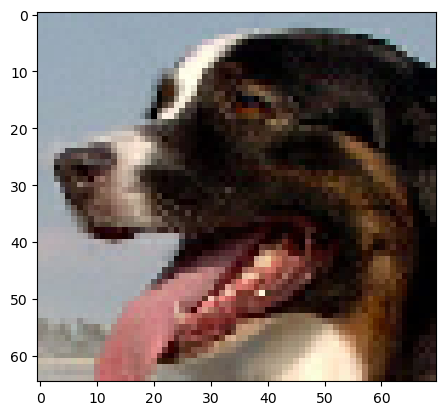

In [7]:
#To manipulate the image.
image2 = image[5:70,0:70] #65 x 70 pixels.
plt.imshow(image2, cmap=plt.cm.gray)
plt.show()

data type: <class 'numpy.ndarray'>, shape: (30, 30, 3)


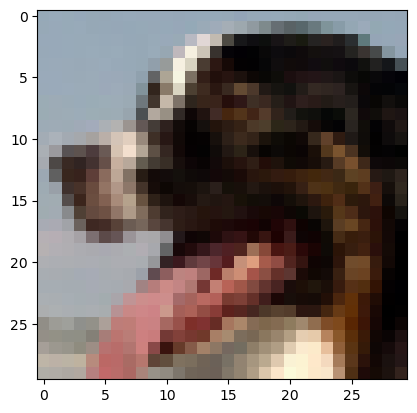

In [8]:
image3 = resize(image2, (30, 30), mode='symmetric') #Now, 30 x 30 pixels.
plt.imshow(image3, cmap=cm.gray)
print("data type: %s, shape: %s" %
      (type(image3), image3.shape))

In [9]:
image_row = image3.flatten()
print("data type: %s, shape: %s" %
      (type(image_row), image_row.shape))

data type: <class 'numpy.ndarray'>, shape: (2700,)


# Managing Data from Relational Databases

In [10]:
#To gain access to the data-base engine.
from sqlalchemy import create_engine
engine = create_engine('sqlite:///:memory:')

# Accessing Data from the Web

In [29]:
#First, the libraries are imported.
from lxml import objectify
import pandas as pd

#parse means 'ayristirma'
xml = objectify.parse(open('XMLData.xml'))

#You obtain access to the root node using the getroot() method. Because XML are structured over a root node, analog to a tree.
root = xml.getroot()

#Data handling relies on a DataFrame.
df = pd.DataFrame(columns=('Number', 'String', 'Boolean'))
#df = pd.DataFrame()

#retrives [0] to [4]; [0], [1], [2]: text.
#for i in range(0,4):
    #obj = root.getchildren()[i].getchildren()
    
    # Print extracted values for debugging
    #print([obj[0].text, obj[1].text, obj[2].text])
    
    #row = dict(zip(['Number', 'String', 'Boolean'],
                   #[obj[0].text, obj[1].text,
                   # obj[2].text]))
    #row_s = pd.Series(row, dtype = 'object')
    #row_s.name = i
    #df = df.append(row_s)
    #df = pd.concat([df, row_s], ignore_index=True)
    
#It seems like the issue is that the values extracted from the XML file are not being assigned to the DataFrame columns correctly.
#Instead of directly using zip(['Number', 'String', 'Boolean'], [obj[0].text, obj[1].text, obj[2].text]), 
#let's assign the values directly to the DataFrame columns using .loc.
    
for i in range(0, 4):
    obj = root.getchildren()[i].getchildren()
    
    df.loc[i, 'Number'] = obj[0].text
    df.loc[i, 'String'] = obj[1].text
    df.loc[i, 'Boolean'] = obj[2].text

s = str()
print(s)
print(df)


  Number  String Boolean
0      1   First    True
1      2  Second   False
2      3   Third    True
3      4  Fourth   False


In [32]:
#First, the libraries are imported.
from lxml import objectify
import pandas as pd

#parse means 'ayristirma'
xml = objectify.parse(open('XMLData.xml'))

#You obtain access to the root node using the getroot() method. Because XML are structured over a root node, analog to a tree.
root = xml.getroot()

#Data handling relies on a DataFrame.
df = pd.DataFrame(columns=('Number', 'String', 'Boolean'))

for i in range(0, 4):
    obj = root.getchildren()[i].getchildren()
    
    df.loc[i, 'Number'] = obj[0].text
    df.loc[i, 'String'] = obj[1].text
    df.loc[i, 'Boolean'] = obj[2].text
    # Print extracted values for debugging
    print([obj[0].text, obj[1].text, obj[2].text])

s = str()
print(s)
print(df)

['1', 'First', 'True']
['2', 'Second', 'False']
['3', 'Third', 'True']
['4', 'Fourth', 'False']

  Number  String Boolean
0      1   First    True
1      2  Second   False
2      3   Third    True
3      4  Fourth   False
